# Import libs

In [21]:
import sys, os
if not sys.path[0] == os.path.abspath('..'):
    sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
from knn.knn import knn
from dmc.dmc import dmc
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
from utils.functions import confusion_matrix, confusion_matrix_mean
from matplotlib import pyplot as plt

# Loading Artificial II dataset

In [22]:
Xy = pd.read_csv('./datasets/artificial_II.dat', header=None, sep=' ', engine='python')

X = Xy.drop(Xy.columns[-1:], axis=1)
y = Xy[Xy.columns[-1]]

# Running the tests and computing informations

In [23]:
realizations = 20
knn_hit_rate_list = []
dmc_hit_rate_list = []
nb_hit_rate_list = []
knn_std_dev = 0
dmc_std_dev = 0
nb_std_dev = 0
knn_confusion_matrix_list = []
dmc_confusion_matrix_list = []
nb_confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model = knn(k=3, type_distance_calc='euclidean')
    knn_model.fit(X_train, y_train)

    dmc_model = dmc(type_distance_calc='euclidean')
    dmc_model.fit(X_train, y_train)

    nb_model = naive_bayes_classifier()
    nb_model.fit(X_train, y_train)

    knn_hit_rate_list.append(knn_model.score(X_test, y_test))
    dmc_hit_rate_list.append(dmc_model.score(X_test, y_test))
    nb_hit_rate_list.append(nb_model.score(X_test, y_test))

    knn_y_pred = [knn_model.predict(x) for x in X_test.values]
    dmc_y_pred = [dmc_model.predict(x) for x in X_test.values]
    nb_y_pred = [nb_model.predict(x) for x in X_test.values]

    knn_confusion_matrix_list.append(confusion_matrix(y_test, knn_y_pred))
    dmc_confusion_matrix_list.append(confusion_matrix(y_test, dmc_y_pred))
    nb_confusion_matrix_list.append(confusion_matrix(y_test, nb_y_pred))

knn_std_dev = np.std(knn_hit_rate_list)
dmc_std_dev = np.std(dmc_hit_rate_list)
nb_std_dev = np.std(nb_hit_rate_list)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])
w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

# Showing knn informations computed

In [24]:
print('----------------- KNN model -----------------')
print('Hit rate:')
print(knn_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(knn_hit_rate_list)/len(knn_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(knn_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in knn_confusion_matrix_list:
    print(matrix, end='\n')

----------------- KNN model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     2.0  1.0  3.0
2.0   24    0    0
1.0    0   16    0
3.0    0    0   20
     2.0  1.0  3.0
2.0   23    0    0
1.0    0   19    0
3.0    0    0   18
     3.0  1.0  2.0
3.0   13    0    0
1.0    0   19    0
2.0    0    0   28
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   24    0
2.0    0    0   18
     3.0  2.0  1.0
3.0   22    0    0
2.0    0   19    0
1.0    0    0   19
     3.0  1.0  2.0
3.0   21    0    0
1.0    0   21    0
2.0    0    0   18
     1.0  3.0  2.0
1.0   21    0    0
3.0    0   22    0
2.0    0    0   17
     2.0  1.0  3.0
2.0   21    0    0
1.0    0   19    0
3.0    0    0   20
     2.0  3.0  1.0
2.0   20    0    0
3.0    0   27    0
1.0    0    0   13
     3.0  1.0  2.0
3.0   21    0    0
1.0    0   17    0
2.0    0    0   22
     2.0  1.0  3.0
2.0  

In [25]:
confusion_matrix_mean(knn_confusion_matrix_list)

,2.0,1.0,3.0
2.0,20,0,0
1.0,0,18,0
3.0,0,0,20


# Showing dmc informations computed

In [27]:
print('----------------- DMC model -----------------')
print('Hit rate:')
print(dmc_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(dmc_hit_rate_list)/len(dmc_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(dmc_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in dmc_confusion_matrix_list:
    print(matrix, end='\n')

----------------- DMC model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     2.0  1.0  3.0
2.0   24    0    0
1.0    0   16    0
3.0    0    0   20
     2.0  1.0  3.0
2.0   23    0    0
1.0    0   19    0
3.0    0    0   18
     3.0  1.0  2.0
3.0   13    0    0
1.0    0   19    0
2.0    0    0   28
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   24    0
2.0    0    0   18
     3.0  2.0  1.0
3.0   22    0    0
2.0    0   19    0
1.0    0    0   19
     3.0  1.0  2.0
3.0   21    0    0
1.0    0   21    0
2.0    0    0   18
     1.0  3.0  2.0
1.0   21    0    0
3.0    0   22    0
2.0    0    0   17
     2.0  1.0  3.0
2.0   21    0    0
1.0    0   19    0
3.0    0    0   20
     2.0  3.0  1.0
2.0   20    0    0
3.0    0   27    0
1.0    0    0   13
     3.0  1.0  2.0
3.0   21    0    0
1.0    0   17    0
2.0    0    0   22
     2.0  1.0  3.0
2.0  

In [28]:
confusion_matrix_mean(dmc_confusion_matrix_list)

,2.0,1.0,3.0
2.0,20,0,0
1.0,0,18,0
3.0,0,0,20


# Showing naive bayes informations computed

In [29]:
print('----------------- NAIVE BAYES model -----------------')
print('Hit rate:')
print(nb_hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(nb_hit_rate_list)/len(nb_hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(nb_std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in nb_confusion_matrix_list:
    print(matrix, end='\n')

----------------- NAIVE BAYES model -----------------
Hit rate:
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Accuracy:
1.0

Standard Deviation:
0.0

Confusion Matrix:
     2.0  1.0  3.0
2.0   24    0    0
1.0    0   16    0
3.0    0    0   20
     2.0  1.0  3.0
2.0   23    0    0
1.0    0   19    0
3.0    0    0   18
     3.0  1.0  2.0
3.0   13    0    0
1.0    0   19    0
2.0    0    0   28
     1.0  3.0  2.0
1.0   18    0    0
3.0    0   24    0
2.0    0    0   18
     3.0  2.0  1.0
3.0   22    0    0
2.0    0   19    0
1.0    0    0   19
     3.0  1.0  2.0
3.0   21    0    0
1.0    0   21    0
2.0    0    0   18
     1.0  3.0  2.0
1.0   21    0    0
3.0    0   22    0
2.0    0    0   17
     2.0  1.0  3.0
2.0   21    0    0
1.0    0   19    0
3.0    0    0   20
     2.0  3.0  1.0
2.0   20    0    0
3.0    0   27    0
1.0    0    0   13
     3.0  1.0  2.0
3.0   21    0    0
1.0    0   17    0
2.0    0    0   22
     2.0  1.0  3

In [30]:
confusion_matrix_mean(nb_confusion_matrix_list)

,2.0,1.0,3.0
2.0,20,0,0
1.0,0,18,0
3.0,0,0,20


# Choosing two columns from the last X_train and X_test to plot decision surface

In [31]:
X_train_2d, X_test_2d = X_train[X_train.columns[:2]], X_test[X_train.columns[:2]]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
            0         1
276  1.300728  1.075619
104 -1.393042  0.970883
176 -0.747402  0.876872
267  1.034876  1.498733
39  -1.140855 -0.638845
..        ...       ...
195 -1.040192  1.115275
282  0.900284  0.954124
181 -0.893702  1.002027
87  -0.949441 -0.780632
102 -0.772338  1.277515

[240 rows x 2 columns]
Test dataset:
            0         1
103 -1.051750  1.029824
31  -1.117516 -1.320849
40  -0.913580 -1.160420
18  -1.048592 -0.970849
88  -0.718327 -1.348600
245  1.122040  0.622589
148 -1.031252  0.954299
93  -0.927113 -0.750590
84  -1.133446 -0.952521
129 -0.818109  1.034085
163 -0.725721  1.215186
246  1.148693  1.408741
117 -0.779410  0.857687
189 -0.848696  1.118836
201  1.172253  1.135125
220  0.802488  0.931450
106 -1.062510  0.748138
280  1.241559  0.991458
23  -1.005674 -0.592149
164 -0.757936  1.342960
21  -0.998352 -1.050897
292  0.723305  0.903964
136 -0.973813  1.110697
275  0.579957  0.918571
108 -0.883589  0.852585
1   -1.308985 -0.995508
146 -1.0530

# Training the models with the new dataset 2d

In [32]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)
dmc_model = dmc(type_distance_calc='euclidean')
dmc_model.fit(X_train_2d, y_train)
nb_model = naive_bayes_classifier()
nb_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting knn decision surface

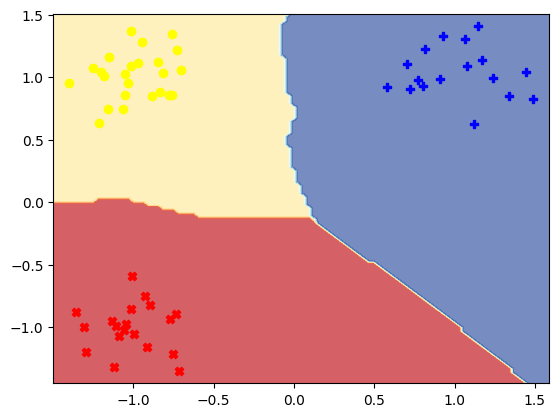

In [33]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[knn_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

knn_y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

one = np.where(knn_y_pred == 1)
two = np.where(knn_y_pred == 2)
three = np.where(knn_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting dmc decision surface

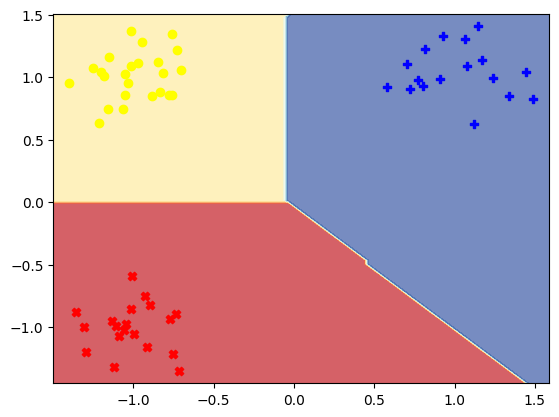

In [34]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[dmc_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

dmc_y_pred = np.array([dmc_model.predict(x) for x in X_test_2d.values])

one = np.where(dmc_y_pred == 1)
two = np.where(dmc_y_pred == 2)
three = np.where(dmc_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()

# Plotting naive bayes decision surface

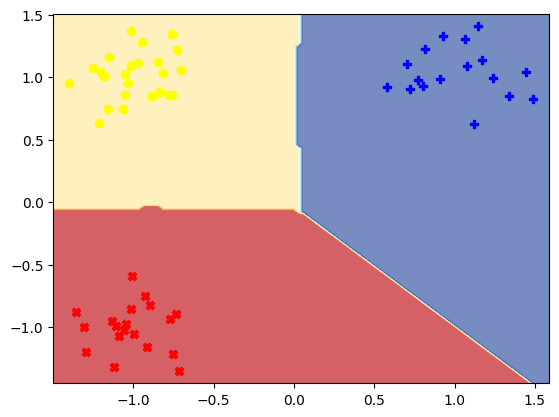

In [35]:
data = X_test_2d[:][:].values

x_min, x_max = data[:, 0].min() - 0.1, data[:,0].max() + 0.1
y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
np.linspace(y_min, y_max, 100))

x_in = np.c_[xx.ravel(), yy.ravel()]

y_pred = [[nb_model.predict(x) for x in x_in]]

y_pred = np.round(y_pred).reshape(xx.shape)

plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7 )

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

nb_y_pred = np.array([nb_model.predict(x) for x in X_test_2d.values])

one = np.where(nb_y_pred == 1)
two = np.where(nb_y_pred == 2)
three = np.where(nb_y_pred == 3)

plt.scatter(data[one, 0], data[one, 1],
            color='red', marker='X', label='one')
plt.scatter(data[two, 0], data[two, 1],
            color='yellow', marker='o', label='two')
plt.scatter(data[three, 0], data[three, 1],
            color='blue', marker='P', label='three')

plt.show()